# Exploring Hacker News Posts
Written by Neil Mackenzie

---
This guided project formed part of the "Python for Data Science: Intermediate" [course](https://www.dataquest.io/course/python-for-data-science-intermediate/) of the Dataquest.io Data Scientist in Python [path.](https://www.dataquest.io/path/data-scientist/)

The project is useful to become more familiar with basic data cleaning and data analysis as well as the use of datetime objects in Python

The aim of this project is to assess the popularity of different types of posts on the Hacker News site. Hacker News is a site which allows users to post stories which can be voted and commented upon.

The dataset used in this project is a random sample of approximately 20 000 rows of submissions that got at least one comment. In this project, we are specifically interested in comparing the popularity of "Ask HN" posts and "Show HN" posts. A description of each of these is given below:
- Ask HN: A user-submitted post to ask the Hacker News community a question
- Show HN: A user-submitted post to show the community a project, product, interesting ideas etc.

The criteria for defining 'popularity' in this project are the number of comments and the effect that the posting time has on the number of comments a post receives. We would therefore like to answer the following questions:
1. Do Ask HN or Show HN receive more comments on average?
2. Do posts created at a certain time receive more comments on average?

# Introducing the dataset

A description of each of the columns is given below:

- id: The unique identifier from Hacker News for the post
- title: The title of the post
- url: The URL that the posts links to, if it the post has a URL
- num_points: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
- num_comments: The number of comments that were made on the post
- author: The username of the person who submitted the post
- created_at: The date and time at which the post was submitted


In [1]:
from csv import reader

#Open and read data to variable named hn:
hn_csv = open('HN_posts_year_to_Sep_26_2016.csv',encoding = 'UTF-8')
hn_data = reader(hn_csv)
hn = list(hn_data)
print(hn[0:5])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16']]


Separate header row from the rest of the data

In [2]:
headers = hn[0]
del hn[0]

print("Headers:\n",headers)

print("\nFirst five rows:")
for i in range(5):
    print("Row",i+1)
    print(hn[i])

Headers:
 ['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

First five rows:
Row 1
['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26']
Row 2
['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24']
Row 3
['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19']
Row 4
['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16']
Row 5
['12578979', 'How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake', 'https://www.talend.com/blog/2016/05/12/talend-and-Â\x93the-data-vaultÂ\x94', '1', '0

Separate posts beginning with Ask HN and Show HN into two different lists

In [3]:
ask_posts, show_posts, other_posts = [], [], []

for row in hn:
    title = row[1].lower()
    if title.startswith('ask hn'):
        ask_posts.append(row)
    elif title.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
print ('Ask Posts:',len(ask_posts),'\nShow Posts:',len(show_posts),'\nOther Posts:',len(other_posts))

Ask Posts: 9139 
Show Posts: 10158 
Other Posts: 273822


Check if ask posts or show posts receive more comments

In [4]:
def find_num_comments(posts):
    current_list = []
    for row in posts:
        num_comments = int(row[4])
        current_list.append(num_comments)
    return current_list

def calc_avg(num_comments):
    avg = sum(num_comments)/len(num_comments)
    return avg

total_ask_comments = find_num_comments(ask_posts)
total_show_comments = find_num_comments(show_posts)
avg_ask_comments = round(calc_avg(total_ask_comments),2)
avg_show_comments = round(calc_avg(total_show_comments),2)

print ('Average number of comments for ask posts:', avg_ask_comments)
print ('Average number of comments for show posts:', avg_show_comments)

Average number of comments for ask posts: 10.39
Average number of comments for show posts: 4.89


Ask posts receive more comments (10.39 per post) than show posts (4.89 per post)

---

# Analysing ask_posts using Pandas and Matplotlib

Moving forward, only the ask_posts list will be analysed since it received more comments per post. The next step is to analyse the number of posts created per hour of the day along with the total number of comments made in each hour.

Note that I came back to this project after learning about Pandas and Matplotlib in later courses. The code below implements these lessons to generate simpler, more efficient code that also presents far neater output than standard lists. The original code for this project (before the Pandas and Matplotlib implementation) can be found 
# here

In [5]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#Create list containing created_at (index 6) and num_comments (index 4) for each post
result_list = []
for row in ask_posts:
    result_list.append([row[6],int(row[4])])

#Count no. of posts and no. of comments by hour of day. Results stored in dictionarys 
counts_by_hour = {}
comments_by_hour = {}

for row in result_list:
    #created_at info is stored at index 0 of each row. num_comments is at index 1
    date_object = dt.datetime.strptime(row[0],"%m/%d/%Y %H:%M")
    hour = date_object.hour
    num_comments = row[1]
    
    if hour in counts_by_hour:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += row[1]
    else:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = row[1]

In [6]:
#Create a dataframe from the two dictionaries generated in the block above. 

#Series objects can be made from dictionaries much quicker and easier than dataframes 
#(according to what I currently know), but I chose to use DataFrames so that
#columns can be labeled
def get_df(dict_values, col):
    keys = []
    values = []
    items = dict_values.items()
    for item in items:
        keys.append(item[0]), values.append(item[1])
        
    data = {'Hour': keys,
           col: values}
    df = pd.DataFrame(data).sort_values('Hour')
    return df

In [7]:
#Create counts_df dictionary using get_df function
counts_df = get_df(counts_by_hour, 'Counts')
counts_df.style.hide_index()

Hour,Counts
0,301
1,282
2,269
3,271
4,243
5,209
6,234
7,226
8,257
9,222


In [8]:
#Create comments_df dictionary using get_df function
comments_df = get_df(comments_by_hour, 'Comments')
comments_df.style.hide_index()

Hour,Comments
0,2277
1,2089
2,2996
3,2154
4,2360
5,1838
6,1587
7,1585
8,2362
9,1477


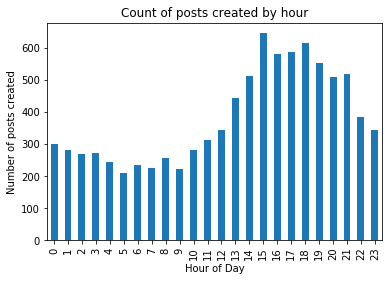

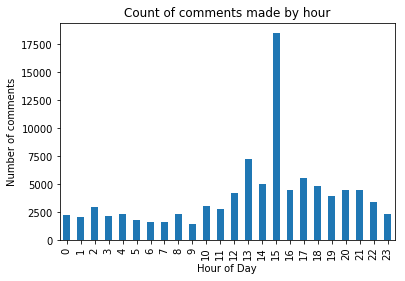

In [9]:
#Create pandas Series object from counts and comments dictionaries to plot graphs
counts_by_hour = pd.Series(counts_by_hour).sort_index()
counts_by_hour.plot(kind = 'bar')
plt.title("Count of posts created by hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of posts created")
plt.show()

comments_by_hour = pd.Series(comments_by_hour).sort_index()
comments_by_hour.plot(kind = 'bar')
plt.title("Count of comments made by hour")
plt.ylabel("Number of comments")
plt.xlabel("Hour of Day")
plt.show()

# Graph Analysis

Plotting the charts above makes data visualization far easier than simple lists or dictionaries. The most popular times for both posting and commenting can be easily seen form these charts.

- The majority of posts are created between midday and early evening (14:00 - 21:00)
- More comments are created during the same period, but there is a massive spike during the time from 15:00 - 16:00


# Calcaulate averages
Calculate avg number of comments per post for posts created during each hour of the day:

In [10]:
avg_by_hour = comments_by_hour/counts_by_hour
avg_by_hour

0      7.564784
1      7.407801
2     11.137546
3      7.948339
4      9.711934
5      8.794258
6      6.782051
7      7.013274
8      9.190661
9      6.653153
10    10.684397
11     8.964744
12    12.380117
13    16.317568
14     9.692008
15    28.676471
16     7.713299
17     9.449744
18     7.942997
19     7.163043
20     8.749020
21     8.687259
22     8.804178
23     6.696793
dtype: float64

Create a new series object to sort the list and show the five highest avg number of comments per post for posts created during each hour of the day

In [11]:
sorted_by_comments = avg_by_hour.sort_values(ascending = False)
print("Top 5 hours for 'Ask Posts' Comments:")
sorted_by_comments.head(5)

Top 5 hours for 'Ask Posts' Comments:


15    28.676471
13    16.317568
12    12.380117
2     11.137546
10    10.684397
dtype: float64

# Conclusion
---

In this project, we have analysed data about Hacker News posts to determine whether 'Ask' or 'Show' posts were more popular and assess whether posts created at certain hours of the day receive more comments on average.

We found that ask posts receive more comments than show posts. This is not surprising since it is expected that more people will respond to questions rather than simply comment a reaction to something you show them on an information site like Hacker News.

It was also clear that the majority of 'Ask' posts were made during the afternoon, and an outstanding majority of comments were made on posts created during the period of 15:00 - 16:00 each day.

If one were looking to create a post that would attract a lot of attention (views & comments) then the post should ideally be created in the "Ask HN" section between 15:00 and 16:00. Creating a post during this time would maximise the potential for the post to gain popularity and therefore profitability through paid advertisements.